In [ ]:
#This dataset contains six million ratings for ten thousand most popular (with most ratings) books. There are also:

    #books marked to read by the users
    #book metadata (author, year, etc.)
    #tags/shelves/genres

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

goodbooks = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')
goodbooks_ratings = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv')
goodbooks_toread = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/to_read.csv')

goodbooks_tags = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/book_tags.csv')
good_books_books_tabs = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/book_tags.csv')

In [10]:
goodbooks.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [61]:
goodbooks.shape
#ten thousand book titles and 23 features

(10000, 23)

In [62]:
goodbooks.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [63]:
#count the number of ratings each user has done (want to limit user bias)
goodbooks_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [64]:
goodbooks_ratings.user_id.nunique()

53424

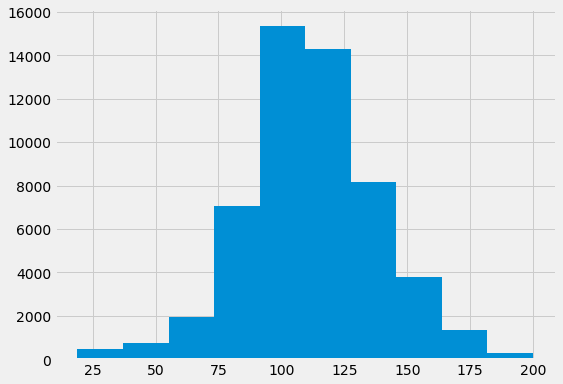

In [65]:
goodbooks_ratings.groupby('user_id').book_id.nunique().hist()
#looks like most users rate 75 to 125 books

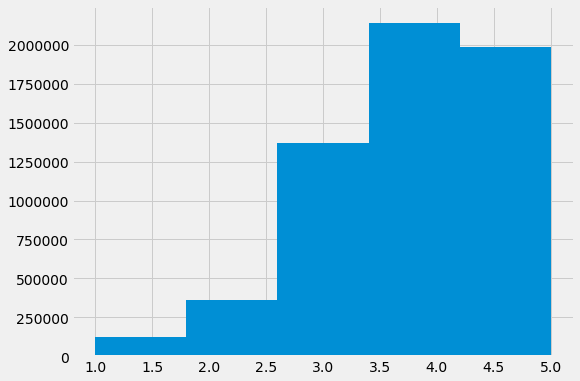

In [66]:
goodbooks_ratings.rating.hist(bins=5);
#in this dataset most ratings are 4 to 5

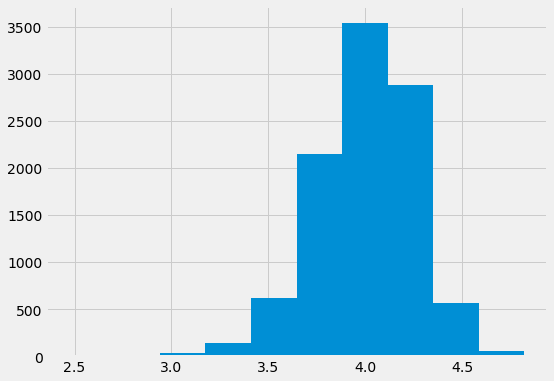

In [67]:
goodbooks.average_rating.hist()
#the average ratings is 4

In [68]:
goodbooks.dtypes

book_id                        int64
goodreads_book_id              int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
dtype: object

In [69]:
goodbooks.isnull().sum()
#the features with nulls are likely not important

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

# Start of Technical Notebook Portion

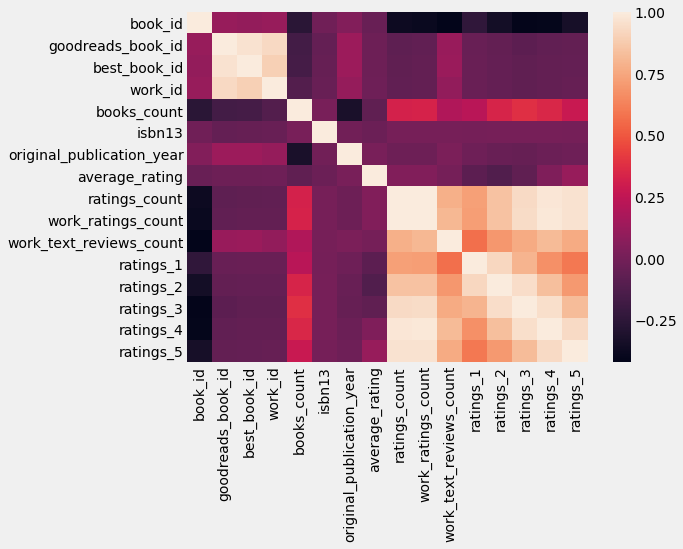

In [73]:
#What influences a book's rating? 
sns.heatmap(goodbooks.corr());
#none of the features below have much correlation. the few that do are due to simliar ratings. 

In [74]:
#Is there a relationship between the number of ratings and the average rating?
goodbooks['average_rating'].corr(goodbooks['ratings_count'])
#not really, the correlation is really low at 0.045

0.04499039263115212

In [75]:
#create a column titled "series_y_n" and create a subset df with only series
goodbooks.title.head()

0              The Hunger Games (The Hunger Games, #1)
1    Harry Potter and the Sorcerer's Stone (Harry P...
2                              Twilight (Twilight, #1)
3                                To Kill a Mockingbird
4                                     The Great Gatsby
Name: title, dtype: object

In [76]:
goodbooks['series_y_n'] = goodbooks.title.str.contains('#')

In [77]:
goodbooks_series = goodbooks[goodbooks.title.str.contains('#')] #only series have # + digit

In [78]:
goodbooks_non_series = goodbooks[goodbooks.series_y_n == False] 

In [79]:
#create a column titled 'title_length' for both df
goodbooks_series['title_length'] = goodbooks_series.title.str.len()
goodbooks_non_series['title_length'] = goodbooks_non_series.title.str.len()
goodbooks['title_length'] = goodbooks.title.str.len()

C:\Users\athu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\athu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
goodbooks_non_series.head()
goodbooks_series.head()
goodbooks.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,series_y_n,title_length
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,True,39
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,True,56
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,True,23
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,False,21
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,False,16


In [81]:
goodbooks.average_rating.mean()

4.002191000000001

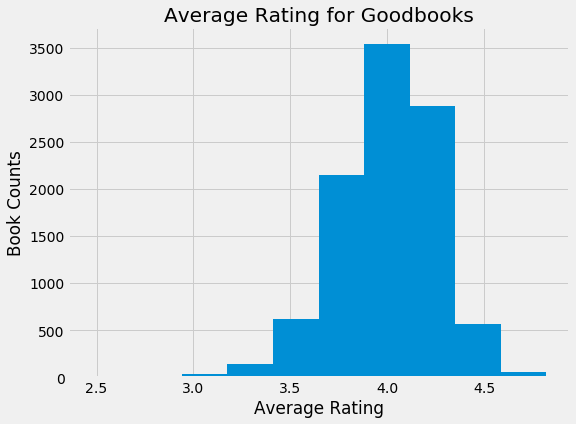

In [82]:
ax = goodbooks.average_rating.hist(bins=10);

# Add title and axis names
plt.title('Average Rating for Goodbooks');
plt.xlabel('Average Rating');
plt.ylabel('Book Counts');


In [83]:
goodbooks_series.average_rating.mean()


4.064588394062086

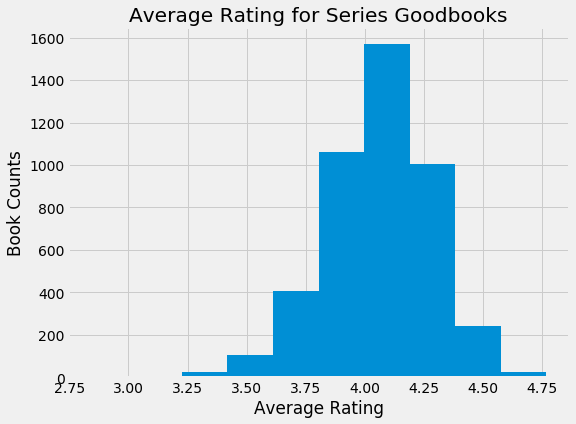

In [84]:
# Add title and axis names
plt.title('Average Rating for Series Goodbooks');
plt.xlabel('Average Rating');
plt.ylabel('Book Counts');

ax = goodbooks_series.average_rating.hist(bins=10);

In [85]:
goodbooks_non_series.average_rating.mean()

3.952241627655749

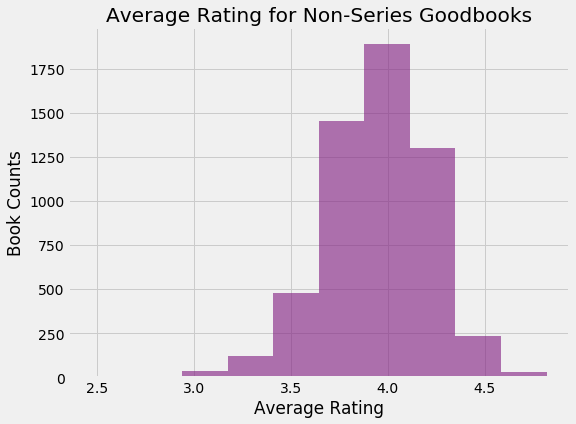

In [86]:
# Add title and axis names
plt.title('Average Rating for Non-Series Goodbooks');
plt.xlabel('Average Rating');
plt.ylabel('Book Counts');

ax = goodbooks_non_series.average_rating.hist(bins=10,color = (0.5,0.1,0.5,0.6));

In [87]:
#Any relationship between book title length and average rating?
goodbooks_series['average_rating'].corr(goodbooks_series['title_length'])

0.08016620621566488

In [88]:
goodbooks_non_series['average_rating'].corr(goodbooks_non_series['title_length'])

0.2028807586171958

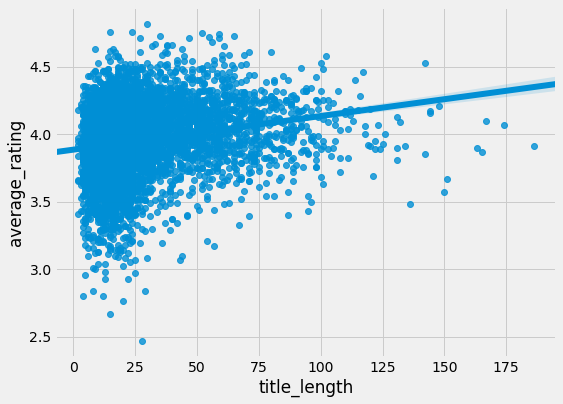

In [89]:
sns.regplot(x="title_length", y="average_rating", data=goodbooks_non_series);

In [90]:
goodbooks_non_series.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'series_y_n', 'title_length'],
      dtype='object')

In [121]:
feature_cols = ['ratings_count', 'title_length']
X = goodbooks_series[feature_cols]  #books counts is the number of book editions
y = goodbooks_series.average_rating 

#train/test/split - Linear Regression
from sklearn.model_selection import train_test_split

#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 ,random_state =1)

from sklearn.linear_model import LinearRegression

lr = LinearRegression() 

model = lr.fit(X_train,y_train) # We then fit the model  
predictions = lr.predict(X_test) # and make predictions based on the X_test
lr.score(X_test, y_test) # Then check the score (Check: what's the default scoring metric for linear regression)

#based on a linear regression model, title_length and ratings count have a 30% prediction accuracy for average_rating.

0.011989903709086813

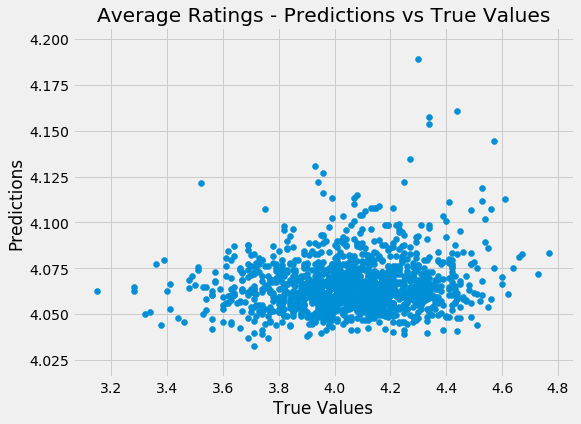

In [122]:
plt.scatter(y_test, predictions);
plt.title('Average Ratings - Predictions vs True Values');
plt.xlabel('True Values');
plt.ylabel('Predictions');

In [123]:
#how does cross validation perform?
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform N-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print(scores)

[-6.61314772e+00 -1.80507270e-03 -3.28550449e-03  7.09740691e-03
 -6.89042340e-04]


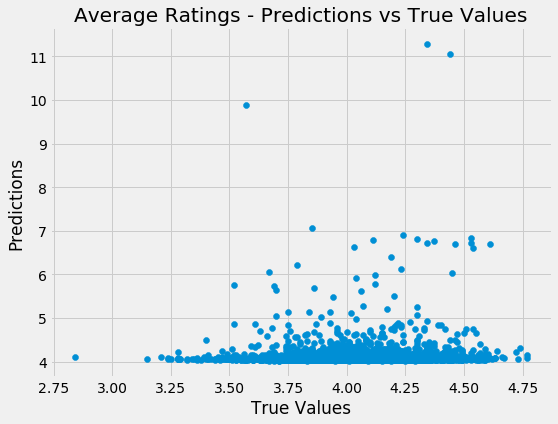

In [124]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=5)
plt.scatter(y, predictions);
plt.title('Average Ratings - Predictions vs True Values');
plt.xlabel('True Values');
plt.ylabel('Predictions');

In [125]:
accuracy = metrics.r2_score(y, predictions)
print(accuracy)

-1.3908338206038593


# Start of Additional EDA

In [126]:
#top 10 rated books
goodbooks.sort_values(by = 'average_rating', ascending = False).head(10)
goodbooks.sort_values(by = 'ratings_count', ascending = False).head(10)
goodbooks.describe() # look at publication year and average rating

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,title_length
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04,32.146200
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04,19.154036
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02,2.000000
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03,18.000000
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03,30.000000
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04,41.000000
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06,186.000000


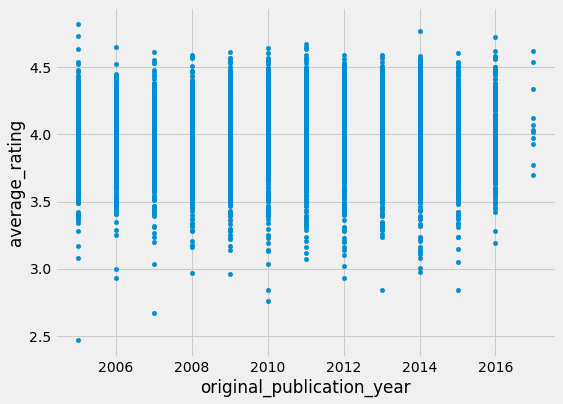

In [127]:
goodbooks_2 = goodbooks[goodbooks.original_publication_year>2004]
goodbooks_2.plot.scatter(x='original_publication_year', y='average_rating');
#plt.title('Average Ratings - Predictions vs True Values');
#plt.xlabel('True Values');
#plt.ylabel('Predictions');

In [128]:
df = goodbooks_2.groupby('original_publication_year').average_rating.mean()

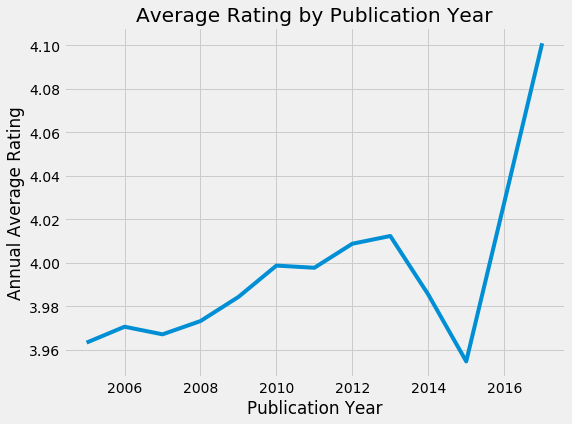

In [129]:
df.plot.line();
#in more recent years, there is less variance in average rating 
plt.title('Average Rating by Publication Year');
plt.xlabel('Publication Year');
plt.ylabel('Annual Average Rating');

In [136]:
df2 = goodbooks.groupby('title_length').average_rating.mean()

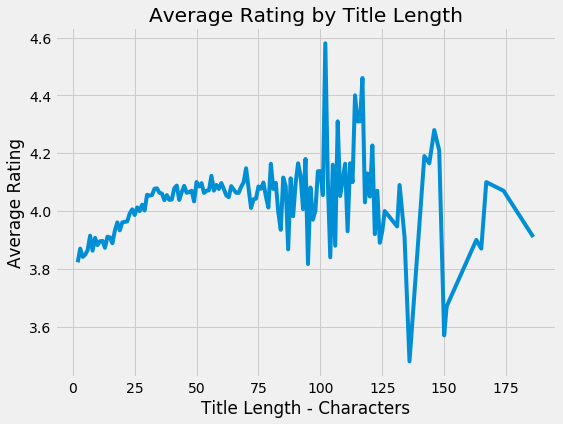

In [137]:
df2.plot.line();
plt.title('Average Rating by Title Length');
plt.xlabel('Title Length - Characters');
plt.ylabel('Average Rating');